In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
from figure_utils import journal_figure, nanmad
import stats as my_stats

In [30]:
model_list = ["alexnet_relu", "convnext", "convnext_ssl", "resnet18", "resnet18_robust", "resnet18_ssl", "resnet", "resnet_ssl", "resnet_swsl", "resnetSIN", "resnet152_2", "resnet101", "resnet101_ssl", "resnet_robust_eps1", "resnet_robust_eps3", "inception", "inceptionv1", "vit", "vit_ssl", "vgg16", "vgg16_robust", "densenet", "densenet169", "densenet161", "densenet161_robust", "densenet121", "mobilenet", "mobilenet_v2", "mobilenet_robust", "squeezenet", "cornetS_t0", "cornetS_reg", "cornetRT_t4", "nasnet", "pnasnet", "swin", "swin_ssl", "shufflenet", "shufflenet_robust"]

In [8]:
def load_model_features(model):
    path_map = {
        "alexnet_relu": "model_features/alexnet_features.npy",
        "resnet": "model_features/resnet50_features.npy",
        "resnet18": "model_features/resnet18_features.npy",
        "resnet18_ssl": "model_features/resnet18_ssl_features.npy",
        "resnet18_robust": "model_features/resnet18_robust_features.npy",
        "resnet_ssl": "model_features/resnet50_ssl_features.npy",
        "resnet_swsl": "model_features/resnet50_swsl_features.npy",
        "resnetSIN": "model_features/resnetSIN_features.npy",
        "resnet152_2": "model_features/resnet152_features.npy",
        "resnet101": "model_features/resnet101_features.npy",
        "resnet101_ssl": "model_features/resnet101_ssl_features.npy",
        "resnet_robust_eps1": "model_features/resnet50_eps1_robust_features.npy",
        "resnet_robust_eps3": "model_features/resnet50_eps3_robust_features.npy",
        "inception": "model_features/inceptionv3_features.npy",
        "inceptionv1": "model_features/inceptionv1_features.npy",
        "vit": "model_features/vit_features.npy",
        "vit_ssl": "model_features/vit_ssl_features.npy",
        "vgg16": "model_features/vgg16_features.npy",
        "vgg16_robust": "model_features/vgg16_robust_features.npy",
        "densenet": "model_features/densenet101_features.npy",
        "densenet169": "model_features/densenet169_features.npy",
        "densenet161": "model_features/densenet161_features.npy",
        "densenet161_robust": "model_features/densenet161_robust_features.npy",
        "densenet121": "model_features/densenet121_features.npy",
        "convnext": "model_features/convnext_features.npy",
        "convnext_ssl": "model_features/convnext_ssl_features.npy",
        "mobilenet": "model_features/mobilenet_features.npy",
        "mobilenet_v2": "model_features/mobilenet_v2_features.npy",
        "mobilenet_robust": "model_features/mobilenet_robust_features.npy",
        "squeezenet": "model_features/squeezenet_features.npy",
        "cornetS_t0": "model_features/CORnet-S_t0_features.npy",
        "cornetS_reg": "model_features/cornetS_regularized_features.npy",
        "cornetRT_t4": "model_features/CORnet-RT_t4_features.npy",
        "nasnet": "model_features/nasnet_features.npy",
        "pnasnet": "model_features/pnasnet_features.npy",
        "swin": "model_features/swin_features.npy",
        "swin_ssl": "model_features/swin_ssl_features.npy",
        "shufflenet": "model_features/shufflenet_features.npy",
        "shufflenet_robust": "model_features/shufflenet_robust_features.npy",
    }
    if model not in path_map:
        raise ValueError("Model not found")
    features = np.load(path_map[model])
    return features.reshape((1320, -1))

In [10]:
ev_forward_m = []
ev_forward_mad = []
for model in model_list:
    out_dir = f'./results_predictions/model2monkey/{model}/'
    for monkey in ["m1", "m2"]:
        ev_per_neuron = np.load(os.path.join(out_dir, f'ev_{monkey}.npy'))
        ev_forward_m.append(np.nanmean(ev_per_neuron))
        ev_forward_mad.append(nanmad(ev_per_neuron))

In [17]:
ev_reversed_m = []
ev_reversed_mad = []
for model in model_list:
    for monkey in ["m1", "m2"]:
        ev_per_neuron = np.load(f'./results_predictions/monkey2model/{monkey}/ev_{model}.npy')
        ev_reversed_m.append(np.nanmean(ev_per_neuron))
        ev_reversed_mad.append(nanmad(ev_per_neuron))
        

alexnet_relu
convnext
convnext_ssl
resnet18
resnet18_robust
resnet18_ssl
resnet
resnet_ssl
resnet_swsl
resnetSIN
resnet152_2
resnet101
resnet101_ssl
resnet_robust_eps1
resnet_robust_eps3
inception
inceptionv1
vit
vit_ssl
vgg16
vgg16_robust
densenet
densenet169
densenet161
densenet161_robust
densenet121
mobilenet
mobilenet_v2
mobilenet_robust
squeezenet
cornetS_t0
cornetS_reg
cornetRT_t4
nasnet
pnasnet
swin
swin_ssl
shufflenet
shufflenet_robust


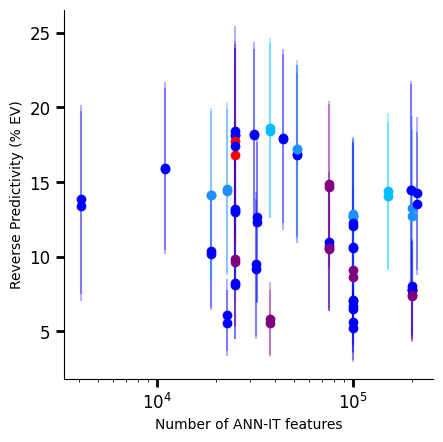

In [ ]:
i = 0
feature_param_counts_dual = []
for model in model_list:
    print(model)
    for monkey in ["m1", "m2"]:
        if "robust" in model:
            color="dodgerblue"
        elif "ssl" in model:
            color="purple"
        elif model == "vit" or model=="swin":
            color="deepskyblue"
        elif "reg" in model:
            color="red"
        else:
            color="blue"
        nb_feature = load_model_features(model).shape[1]
        feature_param_counts_dual.append(nb_feature)
        plt.scatter(nb_feature, ev_reversed_m[i], color=color, zorder=15)
        plt.errorbar(nb_feature, ev_reversed_m[i], yerr=ev_reversed_mad[i], linestyle="None", color=color, alpha=0.3, zorder=5)
        i+= 1

plt.xlabel("Number of ANN-IT features")
plt.xscale("log")
plt.ylabel("Reverse Predictivity (% EV)")
journal_figure()

In [14]:
my_stats.nancorr(ev_reversed_m, feature_param_counts_dual, "spearman")

r(77) = -0.31, p = 0.005


(np.float64(-0.31288847669013725), np.float64(0.005284817847604391))

In [ ]:
import torch
import torchvision.models as models
from timm import create_model

def count_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

param_counts = {}

for name in model_list:
    print(name == "resnet" or name == "resnet_ssl" or name == "resnet_swsl")
    try:
        if name == "resnet" or name == "resnet_ssl" or name == "resnet_swsl":
            model = models.resnet50(pretrained=False)
        elif "resnet18" in name:
            model = models.resnet18(pretrained=False)
        elif name == "alexnet_relu":
            model = models.alexnet(pretrained=False)  # no "relu" variant in torchvision
        elif "resnet101" in name:
            model = models.resnet101(pretrained=False)
        elif name == "resnet152_2":
            model = models.resnet152(pretrained=False)  # no 2x width in torchvision
        elif name == "resnetSIN":
            param_counts[name] = 25557032
        elif name == "resnet_robust_eps1":
            param_counts[name] = 25557032
        elif name == "resnet_robust_eps3":
            param_counts[name] = 25557032
        elif name == "densenet":
            model = models.densenet201(pretrained=False)
        elif name == "densenet121":
            model = models.densenet121(pretrained=False)
        elif name == "densenet169":
            model = models.densenet169(pretrained=False)
        elif name == "densenet161" or name == "densenet161_robust":
            model = models.densenet161(pretrained=False)
        elif "vgg16" in name:
            model = models.vgg16(pretrained=False)
        elif name == "inception":
            model = models.inception_v3(pretrained=False, aux_logits=False)
        elif name == "inceptionv1":
            model = models.googlenet(pretrained=True)
        elif "vit" in name:
            model = models.vit_b_16(pretrained=True)
        elif "convnext" in name:
            model = models.convnext_tiny(pretrained=True)
        elif "mobilenet" in name:
            model = models.mobilenet_v2(pretrained=False)
        elif name == "squeezenet":
            model = models.squeezenet1_1(pretrained=False)
        elif name == "cornetS_t0" or name == "cornetS_reg":
            param_counts[name] = 53416616
        elif name == "cornetRT_t4":
            param_counts[name] = 5208936
        elif name == "nasnet":
            model = create_model("nasnetalarge", pretrained=False)
        elif name == "pnasnet":
            model = create_model("pnasnet5large", pretrained=False)
        elif "swin" in name:
            model = create_model("swin_base_patch4_window7_224", pretrained=True)
        elif "shufflenet" in name:
            model = torch.hub.load('pytorch/vision:v0.10.0', 'shufflenet_v2_x1_0', pretrained=True)
        else:
            raise NotImplementedError(f"{name} not recognized")
        
        if model not in ["cornetS_t0", "cornetRT_t4", "resnetSIN", "resnet_robust_eps1", "resnet_robust_eps3"]:
            num_params = count_params(model)
            param_counts[name] = num_params
    except Exception as e:
        param_counts[name] = f"Error: {str(e)}"

# Print the result
for name, count in param_counts.items():
    print(f"{name}: {count}")


In [43]:
i = 0
param_counts_dual = []
ev_reversed_m_ = []
for model in model_list:
    for monkey in ["m1", "m2"]:
        if "robust" in model:
            color="dodgerblue"
        elif "ssl" in model:
            color="purple"
        elif model == "vit" or model=="swin":
            color="deepskyblue"
        elif "reg" in model:
            color="red"
        else:
            color="blue"
        param_counts_dual.append(param_counts[model])
        ev_reversed_m_.append(ev_reversed_m[i])
        plt.scatter(param_counts[model], ev_reversed_m[i], color=color, zorder=15)
        plt.errorbar(param_counts[model], ev_reversed_m[i], yerr=ev_reversed_mad[i], linestyle="None", color=color, alpha=0.3, zorder=5)
        i+= 1

plt.xlabel("Number of ANN parameters")
plt.xscale("log")
plt.ylabel("Reverse Predictivity (% EV)")
journal_figure()


In [5]:
from sklearn.decomposition import PCA

In [6]:
def participation_ratio(features):
    X = features - np.mean(features, axis=0)
    pca = PCA()
    pca.fit(X)
    eigvals = pca.explained_variance_
    return (np.sum(eigvals) ** 2) / np.sum(eigvals ** 2)


In [ ]:
eff_dim = {}
for model in model_list:
    features = load_model_features(model)
    eff_dim[model] = participation_ratio(features)
        

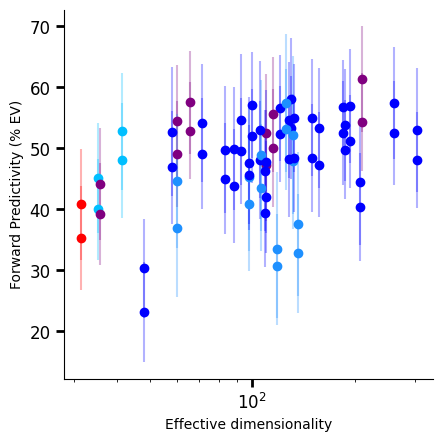

In [ ]:
i = 0
eff_dim_dual = []
ev_forward_m_ = []
for model in model_list:
    if "robust" in model:
        color="dodgerblue"
    elif "ssl" in model:
        color="purple"
    elif model == "vit" or model=="swin":
        color="deepskyblue"
    elif "reg" in model:
        color="red"
    else:
        color="blue"
    for monkey in ["m1", "m2"]:
        eff_dim_dual.append(eff_dim[model])
        ev_forward_m_.append(ev_forward_m[i])
        plt.scatter(eff_dim[model], ev_forward_m[i], color=color, zorder=15)
        plt.errorbar(eff_dim[model], ev_forward_m[i], yerr=ev_forward_mad[i], linestyle="None", color=color, alpha=0.3, zorder=5)
        i+= 1

plt.xlabel("Effective dimensionality")
plt.xscale("log")
plt.ylabel("Forward Predictivity (% EV)")
journal_figure()


In [13]:
my_stats.nancorr(eff_dim_dual, ev_forward_m_, "spearman")

r(77) = 0.37, p = < 0.001


(np.float64(0.3706069592047553), np.float64(0.0008376248857876286))

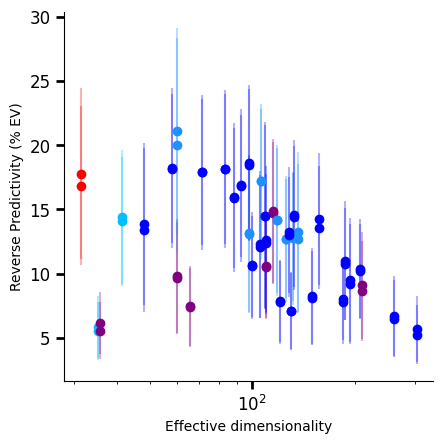

In [19]:
i = 0
eff_dim_dual = []
ev_reversed_m_ = []
for model in model_list:
    if "robust" in model:
        color="dodgerblue"
    elif "ssl" in model:
        color="purple"
    elif model == "vit" or model=="swin":
        color="deepskyblue"
    elif "reg" in model:
        color="red"
    else:
        color="blue"
    for monkey in ["m1", "m2"]:
        eff_dim_dual.append(eff_dim[model])
        ev_reversed_m_.append(ev_reversed_m[i])
        plt.scatter(eff_dim[model], ev_reversed_m[i], color=color, zorder=15)
        plt.errorbar(eff_dim[model], ev_reversed_m[i], yerr=ev_reversed_mad[i], linestyle="None", color=color, alpha=0.3, zorder=5)
        i+= 1

plt.xlabel("Effective dimensionality")
plt.xscale("log")
plt.ylabel("Reverse Predictivity (% EV)")
journal_figure()


In [20]:
my_stats.nancorr(eff_dim_dual, ev_reversed_m_, "spearman")

r(77) = -0.40, p = < 0.001


(np.float64(-0.39878826654633187), np.float64(0.0002987413202186223))

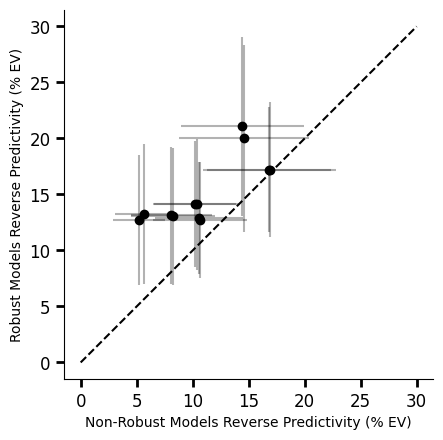

In [23]:
robust_models_list = ["densenet161", "mobilenet_v2", "vgg16", "resnet", "shufflenet", "resnet18"]
robust_means = []
non_robust_means = []
for j, model in enumerate(robust_models_list):
    for i, monkey in enumerate(["m1", "m2"]):
        ev_model = np.load(f"./results_predictions/monkey2model/robust_models/{monkey}/ev_{model}.npy")
        
        ev_robust = np.load(f"./results_predictions/monkey2model/robust_models/{monkey}/ev_{model}_robust.npy")
        robust_means.append(np.nanmean(ev_robust))
        non_robust_means.append(np.nanmean(ev_model))
        plt.scatter(np.nanmean(ev_model), np.nanmean(ev_robust), color="black", label=model if i == 0 else None, zorder=15)
        plt.errorbar(np.nanmean(ev_model), np.nanmean(ev_robust), xerr=nanmad(ev_model), yerr=nanmad(ev_robust), linestyle="None", color="black", alpha=0.3, zorder=5)

plt.xlabel("Non-Robust Models Reverse Predictivity (% EV)")
plt.ylabel("Robust Models Reverse Predictivity (% EV)")
plt.plot([0, 30], [0, 30], linestyle='--', color="black")
journal_figure()
    

In [26]:
my_stats.print_paired_test(robust_means, non_robust_means)

z = 0.0, p < 0.001


np.float64(0.00048828125)

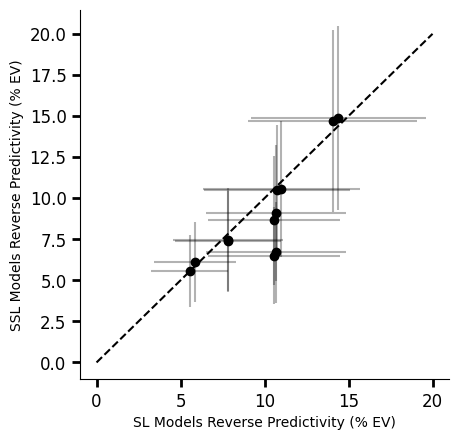

In [28]:
ssl_models_list = ["resnet", "convnext", "vit", "resnet101", "swin"]
sl_means = []
ssl_means = []

for i, monkey in enumerate(["m1", "m2"]):
    ev_model = np.load(f"./results_predictions/monkey2model/ssl_models/{monkey}/ev_resnet.npy")
    sl_means.append(np.nanmean(ev_model))
    ev_ssl = np.load(f"./results_predictions/monkey2model/ssl_models/{monkey}/ev_resnet_swsl.npy")
    ssl_means.append(np.nanmean(ev_ssl))
    plt.scatter(np.nanmean(ev_model), np.nanmean(ev_ssl), color="black", label="resnet_swsl" if i == 0 else None, zorder=15)
    plt.errorbar(np.nanmean(ev_model), np.nanmean(ev_ssl), xerr=nanmad(ev_model), yerr=nanmad(ev_ssl), linestyle="None", color="black", alpha=0.3, zorder=5)

for j, model in enumerate(ssl_models_list, 1):
    for i, monkey in enumerate(["m1", "m2"]):
        ev_model = np.load(f"./results_predictions/monkey2model/ssl_models/{monkey}/ev_{model}.npy")
        sl_means.append(np.nanmean(ev_model))
        ev_ssl = np.load(f"./results_predictions/monkey2model/ssl_models/{monkey}/ev_{model}_ssl.npy")
        ssl_means.append(np.nanmean(ev_ssl))
        plt.scatter(np.nanmean(ev_model), np.nanmean(ev_ssl), color="black", label=model if i == 0 else None, zorder=15)
        plt.errorbar(np.nanmean(ev_model), np.nanmean(ev_ssl), xerr=nanmad(ev_model), yerr=nanmad(ev_ssl), linestyle="None", color="black", alpha=0.3, zorder=5)

plt.xlabel("SL Models Reverse Predictivity (% EV)")
plt.ylabel("SSL Models Reverse Predictivity (% EV)")
plt.plot([0, 20], [0, 20], linestyle='--', color="black")
journal_figure()
    

In [29]:
my_stats.print_paired_test(sl_means, ssl_means)

t(11) = 2.070, p = 0.063


np.float64(0.06276990419466656)